About the dataset:

https://archive.ics.uci.edu/ml/datasets/adult

In [148]:
#importing all libraries
import pandas as pd
import numpy as np

#metrics
from sklearn.model_selection import cross_val_score
import scikitplot as skplt

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target']

In [150]:
train = pd.read_csv('adult.csv', names=columns, na_values=" ?")

In [151]:
train.sample(5)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
18912,24,NaN,412156,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,0,40,Mexico,<=50K
1372,43,Private,221550,Masters,14,Never-married,Other-service,Not-in-family,White,Female,0,0,30,Poland,<=50K
19761,29,Private,114801,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
16661,26,Private,166666,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
19680,28,Private,64307,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [153]:
#Counting unique values
for column in train.columns:
    num = train[column].nunique()
    print("{}: {}".format(column, num))

Age: 73
Workclass: 8
fnlwgt: 21648
Education: 16
Education-Num: 16
Martial Status: 7
Occupation: 14
Relationship: 6
Race: 5
Sex: 2
Capital Gain: 119
Capital Loss: 92
Hours per week: 94
Country: 41
Target: 2


In [154]:
for column in train.drop(columns=['Education-Num']).columns:
    num = train[column].nunique()
    if num<50:
        print("{}: {}\n".format(column, train[column].unique()))

Workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']

Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Martial Status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

Sex: [' Male' ' Female']

Country: [' United-States' ' Cuba' ' Jamaica' ' In

In [155]:
for column in train.drop(columns=['Education-Num']).columns:
    num = train[column].nunique()
    if num<50:
        print("{}\n".format(train[column].value_counts()))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martial Status, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical

In [156]:
for column in train.columns:
    missing = column, train[column].isnull().sum()
    if missing[1] == 0: continue
    print(missing)

('Workclass', 1836)
('Occupation', 1843)
('Country', 583)


In [157]:
train = train.fillna(-1)

In [158]:
train['Target_cat'] = pd.factorize(train['Target'])[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

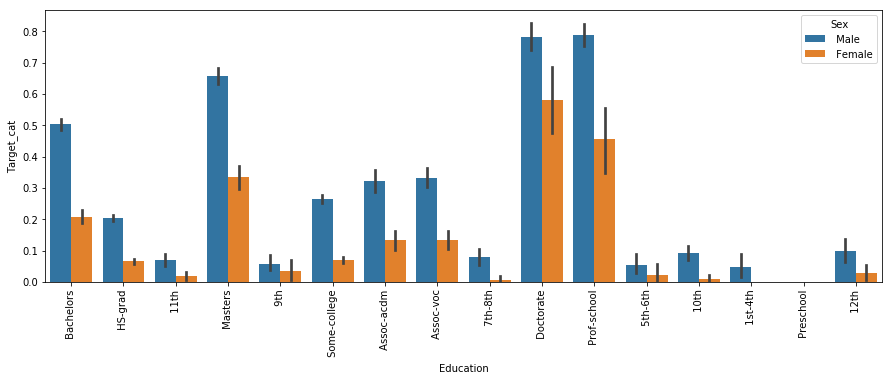

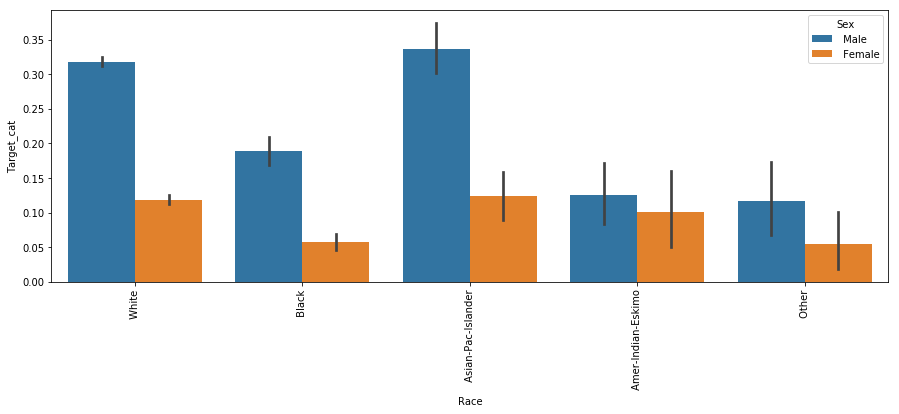

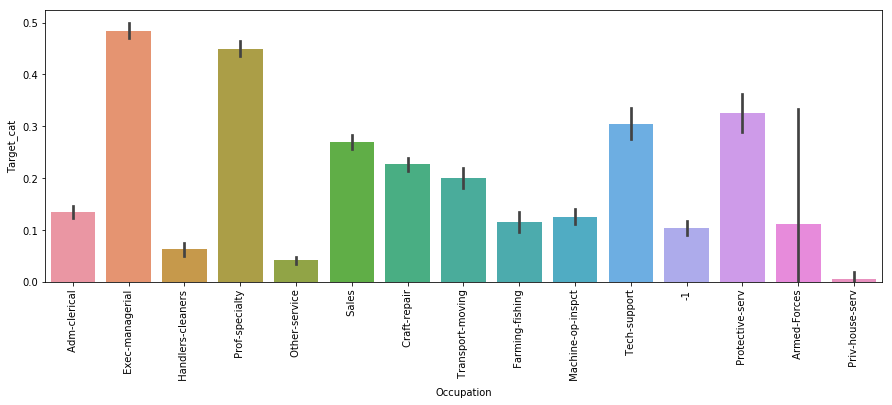

In [159]:
#Small feature exploration
#Education vs Target divided by Sex.

plt.figure(figsize=(15, 5))
sns.barplot(x="Education", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90)

#Race vs Target divided by Sex.

plt.figure(figsize=(15, 5))
sns.barplot(x="Race", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90)

#Occupation vs Target.

plt.figure(figsize=(15, 5))
sns.barplot(x='Occupation', y="Target_cat", data=train)
plt.xticks(rotation=90)

In [160]:
#Creating new Features
train['Net_Capital'] = train['Capital Gain'] - train['Capital Loss']
train['White_Man'] = (train['Race']=='White') & (train['Sex']==False)
train['High_Earner'] = ((train['Occupation'] == 'Exec-managerial') | (train['Occupation'] == 'Prof-specialty'))
train['United States'] = train['Country']== 'United-States'
train['Husb_Wife'] = ((train['Relationship']=='Husband') | (train['Relationship']=='Wife'))
train['Rel_Race'] = train['Relationship'] + train['Race']
train['Hard_worker'] = train['Hours per week']>40
train['Normal_worker'] = train['Hours per week']==40
train['Part_time_worker'] = train['Hours per week']<40

train['High_educ'] = ((train['Education']=='Bachelors') | 
                      (train['Education']=='Prof-school') | 
                      (train['Education']=='Masters') | 
                      (train['Education']=='Doctorate'))

train['Associate'] = ((train['Education']=='Assoc-voc') | 
                      (train['Education']=='Assoc-acdm') | 
                      (train['Education']=='Prof-school'))

train['High_school'] = ((train['Education']=='HS-grad') | 
                        (train['Education']=='Some-college'))

train['Low_educ'] = ((train['Education']=='Preschool') | 
                     (train['Education']=='1st-4th') | 
                     (train['Education']=='5th-6th') | 
                     (train['Education']=='7th-8th') | 
                     (train['Education']=='9th') | 
                     (train['Education']=='10th ') |  
                     (train['Education']=='11th') | 
                     (train['Education']=='12th'))

Marriage = train['Martial Status'].copy()

Marriage[Marriage=="Never-married"] = "Never-Married"
Marriage[Marriage=="Married-AF-spouse"] = "Married"
Marriage[Marriage=="Married-civ-spouse"] = "Married"
Marriage[Marriage=="Married-spouse-absent"] = "Married"
Marriage[Marriage=="Separated"] = "Not-Married"
Marriage[Marriage=="Divorced"] = "Not-Married"
Marriage[Marriage=="Widowed"] = "Widowed"

train['Marriage'] = Marriage

In [161]:
# Changing labels
cat_feats = train.select_dtypes(include=[np.object]).columns

for cat_feat in cat_feats:
    train['{0}_cat'.format(cat_feat)] = pd.factorize(train[cat_feat])[0]

In [162]:
train.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target',
       'Target_cat', 'Net_Capital', 'White_Man', 'High_Earner',
       'United States', 'Husb_Wife', 'Rel_Race', 'Hard_worker',
       'Normal_worker', 'Part_time_worker', 'High_educ', 'Associate',
       'High_school', 'Low_educ', 'Marriage', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat', 'Race_cat',
       'Sex_cat', 'Country_cat', 'Rel_Race_cat', 'Marriage_cat'],
      dtype='object')

In [163]:
feats_all = train.select_dtypes(exclude=[np.object]).drop(columns=["Target_cat"]).columns

Mean Accuracy:  0.8585118555178435 Mean Std:  0.0034615167626975774


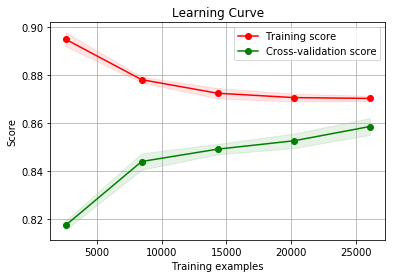

In [164]:
#Doing a model with initial features for benchmark - Decision Tree Classifier
np.random.seed(2019)

feats = ['Age', 'fnlwgt', 'Education-Num', 'Sex_cat', 
         'Capital Gain', 'Capital Loss', 'Hours per week', 
         'Workclass_cat', 'Martial Status_cat', 
         'Occupation_cat', 'Relationship_cat', 'Race_cat', 
         'Country_cat']

X = train[feats].values
y = train['Target_cat'].values

model = DecisionTreeClassifier(max_depth=10, random_state=2019)
DTC_score = cross_val_score(model, X, y, cv=5)

print("Mean Accuracy: ", np.mean(DTC_score), "Mean Std: ", np.std(DTC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8585732617169743 Mean Std:  0.00293819257594177


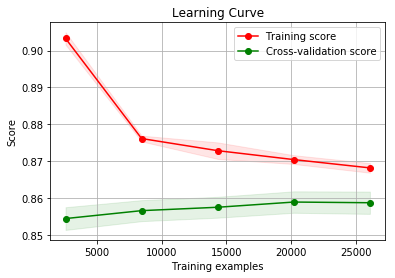

In [165]:
#Doing a model with initial features for benchmark - Random Forest Classifier
np.random.seed(2019)

feats = ['Age', 'fnlwgt', 'Education-Num', 'Sex_cat', 
         'Capital Gain', 'Capital Loss', 'Hours per week', 
         'Workclass_cat', 'Martial Status_cat', 
         'Occupation_cat', 'Relationship_cat', 'Race_cat', 
         'Country_cat']

X = train[feats].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8423576066540139 Mean Std:  0.003587142088836265


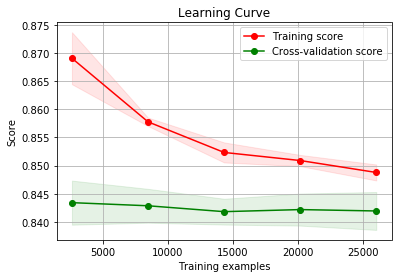

In [166]:
#Doing a model with initial features for benchmark - Extra Tree Classifier
np.random.seed(2019)

orig_feats = ['Age', 'fnlwgt', 'Education-Num', 'Sex_cat', 
         'Capital Gain', 'Capital Loss', 'Hours per week', 
         'Workclass_cat', 'Martial Status_cat', 
         'Occupation_cat', 'Relationship_cat', 'Race_cat', 
         'Country_cat']

X = train[orig_feats].values
y = train['Target_cat'].values

model = ExtraTreesClassifier(max_depth=10, n_estimators=100, random_state=2019)
ETC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(ETC_score), "Mean Std: ", np.std(ETC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

In [167]:
print('DecisionTreeClassifier -', "Mean Accuracy", np.mean(DTC_score), "Mean Std:", np.std(DTC_score))
print('RandomForestClassifier -', "Mean Accuracy:", np.mean(RFC_score), "Mean Std:", np.std(RFC_score))
print('ExtraTreesClassifier -', "Mean Accuracy:", np.mean(ETC_score), "Mean Std:", np.std(ETC_score))

DecisionTreeClassifier - Mean Accuracy 0.8585118555178435 Mean Std: 0.0034615167626975774
RandomForestClassifier - Mean Accuracy: 0.8585732617169743 Mean Std: 0.00293819257594177
ExtraTreesClassifier - Mean Accuracy: 0.8423576066540139 Mean Std: 0.003587142088836265


ExtraTreesClassifier has the lowest score, so we'll focus on **Decision Trees** and **Random Forests**

Mean Accuracy:  0.8578976190503138 Mean Std:  0.0035504792845351125


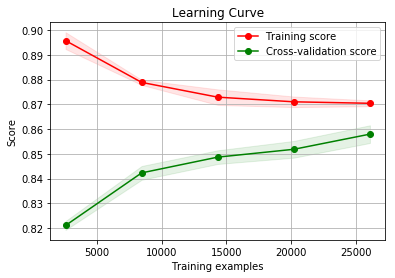

In [168]:
#Doing a model with all features - Decision Tree Classifier
np.random.seed(2019)

X = train[feats_all].values
y = train['Target_cat'].values

model = DecisionTreeClassifier(max_depth=10, random_state=2019)
DTC_score = cross_val_score(model, X, y, cv=5)

print("Mean Accuracy: ", np.mean(DTC_score), "Mean Std: ", np.std(DTC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8595560909932167 Mean Std:  0.003234293097858158


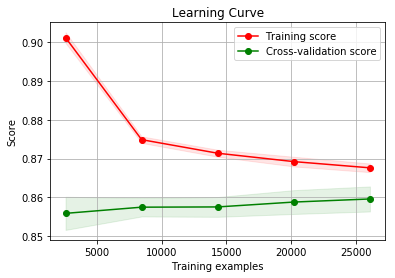

In [169]:
#Doing a model with all features - Random Forest Classifier
np.random.seed(2019)

X = train[feats_all].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

In [170]:
def draw_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

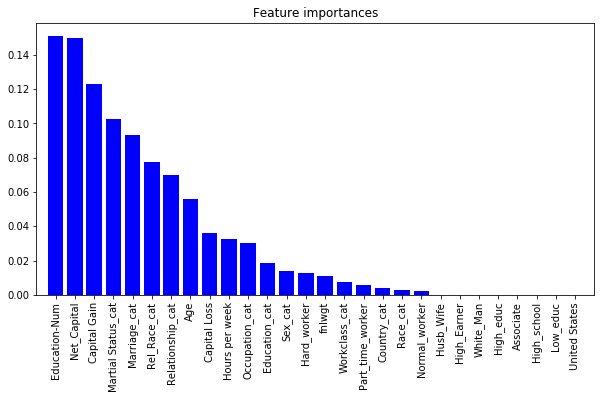

In [171]:
np.random.seed(2019)
model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
model.fit(X, y)
draw_feature_importances(model, feats_all)

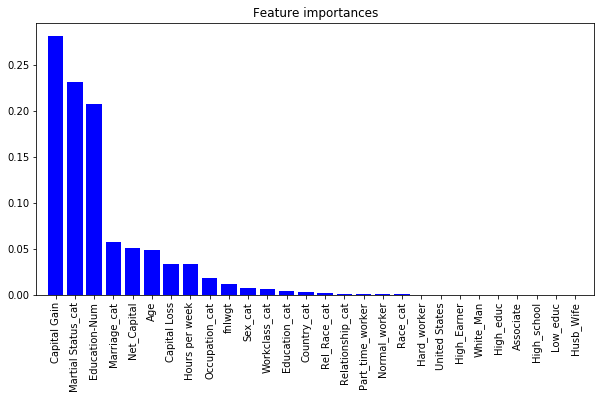

In [172]:
np.random.seed(2019)
model = DecisionTreeClassifier(max_depth=10, random_state=2019)
model.fit(X, y)
draw_feature_importances(model, feats_all)

We'll remove features that were insignificant in both models

In [173]:
feats = ['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Net_Capital', 'Hard_worker', 'Normal_worker',
       'Part_time_worker','Workclass_cat', 'Education_cat', 'Martial Status_cat',
       'Occupation_cat', 'Relationship_cat', 'Race_cat', 'Sex_cat',
       'Country_cat', 'Rel_Race_cat', 'Marriage_cat'] 
#       'White_Man', 'Associate', 'High_school', 'High_educ', 'Low_educ', 'High_Earner', 'United States', 'Husb_Wife']

Mean Accuracy:  0.8602624603373107 Mean Std:  0.003125029592048653


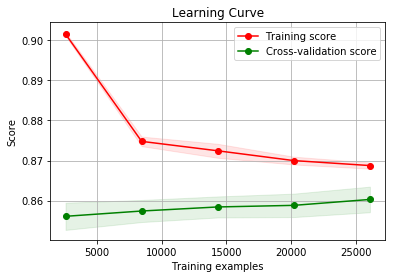

In [174]:
#Doing a model with selected features - Random Forest Classifier
np.random.seed(2019)

X = train[feats].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8580818989501624 Mean Std:  0.0036116844471397926


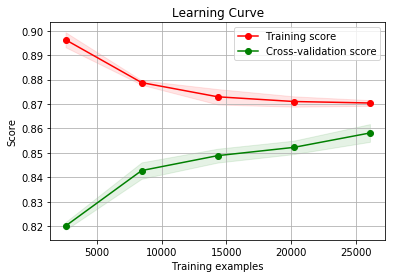

In [175]:
#Doing a model with selected features - Decision Tree Classifier
np.random.seed(2019)

X = train[feats].values
y = train['Target_cat'].values

model = DecisionTreeClassifier(max_depth=10, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Depth 1 :  0.8026166246226127 0.0012982884217031068
Depth 2 :  0.8026166246226127 0.0012982884217031068
Depth 3 :  0.8245141921788628 0.004383988286355221
Depth 4 :  0.8444766580994125 0.004042798803839525
Depth 5 :  0.8455208747124916 0.00455704108124285
Depth 6 :  0.846841438083953 0.004725567476176934
Depth 7 :  0.8534751325170488 0.0028042428168775398
Depth 8 :  0.8552564828762435 0.0037165389590607697
Depth 9 :  0.85599363076908 0.005272217359062268
Depth 10 :  0.8580818989501624 0.0036116844471397926
Depth 11 :  0.8564235024564365 0.004610448075055958
Depth 12 :  0.8532909940844073 0.005472063600172865
Depth 13 :  0.8524309394818378 0.0035382440677998845
Depth 14 :  0.8496669767627851 0.0035238206074016142
Depth 15 :  0.8449987852682463 0.004040651400112122
Depth 16 :  0.8416819215471911 0.0032887077861718274
Depth 17 :  0.8388871708482487 0.0038381948651029386
Depth 18 :  0.8342804468552971 0.0044220776699293906
Depth 19 :  0.8315778573263604 0.0046149098342385415
Depth 20 :  0.

Text(0, 0.5, 'Accuracy Score')

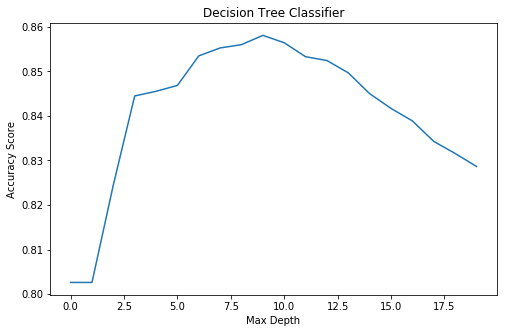

In [176]:
#Checking different depth to optimize the Decision Tree
agg_scores=[]
for i in range(1, 21):
    np.random.seed(2019)
    model = DecisionTreeClassifier(max_depth=i, random_state=2019)
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    print("Depth",i , ": ", np.mean(scores), np.std(scores))
    agg_scores.append(np.mean(scores))

plt.figure(figsize=(8,5))
plt.plot(agg_scores)
plt.title('Decision Tree Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')

**10** seems to be the optimal depth for the Decision Tree

Depth 1 :  0.8011731639725651 0.001281743041860815
Depth 2 :  0.8033844237437051 0.0013881946962796979
Depth 3 :  0.8131507114291544 0.0011934584798100449
Depth 4 :  0.8371979156410294 0.001387058960995188
Depth 5 :  0.8530759214890951 0.0032231520215680156
Depth 6 :  0.8542429457848619 0.00280297850235258
Depth 7 :  0.8550721793985268 0.003102229392790426
Depth 8 :  0.8567613261475536 0.0030804883278317567
Depth 9 :  0.8583583164421487 0.003005557658203746
Depth 10 :  0.8602624603373107 0.003125029592048653
Depth 11 :  0.860262455621737 0.003094929291331571
Depth 12 :  0.8616751754476306 0.0028914662341534923
Depth 13 :  0.8624736823838621 0.003022336816456048
Depth 14 :  0.8643778121323031 0.003188657961549576
Depth 15 :  0.864377802701156 0.003189093362451128
Depth 16 :  0.8645314077948809 0.004191706555371002
Depth 17 :  0.8652684755229666 0.0038718432554216064
Depth 18 :  0.8651455358042185 0.0024912563018627183
Depth 19 :  0.8645620590231369 0.0033800895977083097
Depth 20 :  0.86

Text(0, 0.5, 'Accuracy Score')

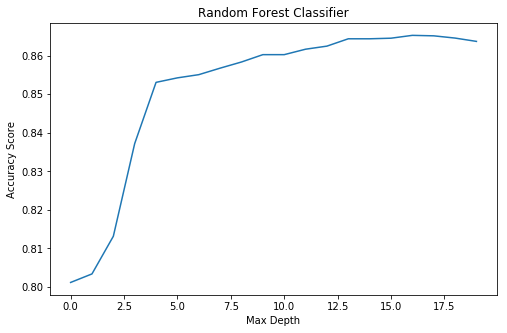

In [177]:
#Checking different depth to optimize Random Forests
agg_scores=[]
for i in range(1, 21):
    np.random.seed(2019)
    model = RandomForestClassifier(max_depth=i, n_estimators=100, random_state=2019)
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    print("Depth",i , ": ", np.mean(scores), np.std(scores))
    agg_scores.append(np.mean(scores))

plt.figure(figsize=(8,5))
plt.plot(agg_scores)
plt.title('Random Forest Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')

Depth over 13 would be overfitting the model.

9-13 seem to be good choices

In [184]:
#Checking different n_estimators to further optimize Random Forests
check_depth = range(9, 14)
check_estimators = range(20, 130, 10)
for j in check_estimators:
    print("N: ", j)
    agg_scores=[]
    for i in check_depth:
        np.random.seed(2019)
        model = RandomForestClassifier(max_depth=i, n_estimators=j, random_state=2019)
        scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
        print("Depth",i , ": ", np.mean(scores), np.std(scores))
        agg_scores.append(np.mean(scores))

N:  20
Depth 9 :  0.857774740634022 0.0027916919629876902
Depth 10 :  0.8591261438566828 0.0034344291046767617
Depth 11 :  0.8607845592127029 0.003890788766153913
Depth 12 :  0.8620744289157463 0.00327383809224559
Depth 13 :  0.8615523206092067 0.0026753653100268105
N:  30
Depth 9 :  0.8578361656954472 0.0025936675862851368
Depth 10 :  0.8597096442156321 0.0033265336531381443
Depth 11 :  0.8606617043742792 0.0034298525426148503
Depth 12 :  0.8621358634083185 0.0031409752472678814
Depth 13 :  0.8623815589384451 0.00304323546140713
N:  40
Depth 9 :  0.8584811335559838 0.002429235136731977
Depth 10 :  0.8599246555084878 0.0036688036707318203
Depth 11 :  0.8606003076062956 0.0036379775688648404
Depth 12 :  0.8618594789253471 0.0033070934393855172
Depth 13 :  0.8619209039867723 0.0033534624551307154
N:  50
Depth 9 :  0.8583583117265752 0.0029979402014307334
Depth 10 :  0.8601088929681744 0.0031926601734261683
Depth 11 :  0.8607538513975639 0.003249675032510701
Depth 12 :  0.8620437493940489

In nearly all cases depth 13 yields the highest score

In [182]:
#Checking in more detail n_estimators to further optimize Random Forests
agg_scores=[]
check_estimators = range(60, 90, 1)
for j in check_estimators:
    np.random.seed(2019)
    model = RandomForestClassifier(max_depth=13, n_estimators=j, random_state=2019)
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    print("N", j , ": ", np.mean(scores), np.std(scores))
    agg_scores.append(np.mean(scores))

N 60 :  0.8620130415789099 0.0035609735886045985
N 61 :  0.8621666042324725 0.0036328998575592074
N 62 :  0.8623508699856005 0.003529023052992938
N 63 :  0.8622587229623158 0.0033448519197322563
N 64 :  0.8623508511233062 0.0032107703425391723
N 65 :  0.8623815636540189 0.003265781251581325
N 66 :  0.8622280057160298 0.0032973909091827402
N 67 :  0.8624122620380105 0.003076941731065832
N 68 :  0.8621972790385964 0.003231915060315636
N 69 :  0.8620437305317544 0.003287898051349958
N 70 :  0.8624429887154438 0.0033973543125385085
N 71 :  0.8623815495072981 0.003156280827863229
N 72 :  0.8623815542228715 0.003241572671214437
N 73 :  0.8624429745687232 0.0031561952045513334
N 74 :  0.8626272450374246 0.003166901736436896
N 75 :  0.8626272450374248 0.0031097954887733706
N 76 :  0.8625043949145745 0.0030548869665160032
N 77 :  0.8623201385925938 0.0032949063482669693
N 78 :  0.8623201385925936 0.0032791232508317474
N 79 :  0.8624737059617299 0.0033792887731732162
N 80 :  0.8622587182467422 0

Mean Accuracy: 0.8626579575681372 Mean Std: 0.00324918789765988


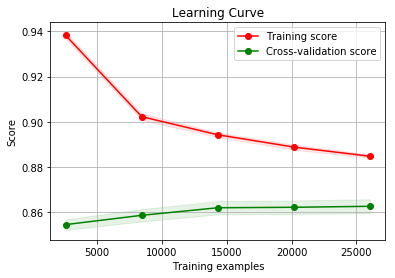

In [183]:
#Score after optimization
#Mean Accuracy: 0.8626579575681372 Mean Std: 0.00324918789765988
np.random.seed(2019)
feats = ['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Net_Capital', 'Hard_worker', 'Normal_worker',
       'Part_time_worker','Workclass_cat', 'Education_cat', 'Martial Status_cat',
       'Occupation_cat', 'Relationship_cat', 'Race_cat', 'Sex_cat',
       'Country_cat', 'Rel_Race_cat', 'Marriage_cat'] 
#       'White_Man', 'Associate', 'High_school', 'High_educ', 'Low_educ', 'High_Earner', 'United States', 'Husb_Wife']

X = train[feats].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=13, n_estimators=88, random_state=2019)
scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy:", np.mean(scores), "Mean Std:", np.std(scores))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)